<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

zsh:1: command not found: wget


#### 2. Connect to the Database


**Install the needed libraries**


In [7]:
!pip install pandas

In [9]:
!pip install matplotlib

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [27]:
QUERY = """
SELECT ConvertedCompYearly, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith
, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith
FROM MAIN;
"""
df = pd.read_sql_query(QUERY, conn)
df
#pd.set_option('display.max_columns', None)

DatabaseError: Execution failed on sql '
SELECT ConvertedCompYearly, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith
, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith
FROM MAIN;
': no such table: MAIN

#### Demo 2: List All Tables


In [30]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name


#### Demo 3: Group Data by Age


In [33]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


DatabaseError: Execution failed on sql '
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
': no such table: main

## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [39]:
# your code goes here
query = """
SELECT CompTotal
FROM MAIN
"""
data = pd.read_sql_query(query, conn)
data.dropna(inplace = True)
data

DatabaseError: Execution failed on sql '
SELECT CompTotal
FROM MAIN
': no such table: MAIN

In [41]:
q1 = data['CompTotal'].quantile(0.25)
q3 = data['CompTotal'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

data_cleaned = data[(data['CompTotal'] > lower_bound) & (data['CompTotal'] < upper_bound)]

NameError: name 'data' is not defined

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = data_cleaned,
            y = 'CompTotal',
            #showfliers=False
           )
plt.show()

NameError: name 'data_cleaned' is not defined

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [35]:
# your code goes here
query = """
SELECT AGE
FROM MAIN
"""
data = pd.read_sql_query(query, conn)

data['Age'].value_counts(dropna = False)


DatabaseError: Execution failed on sql '
SELECT AGE
FROM MAIN
': no such table: MAIN

In [137]:
import random

In [147]:
def age_guess(age_str):
    if not isinstance(age_str, str):
        return None
    age_str = age_str.strip().lower()
    if age_str in ['', 'prefer not to say', 'nan', 'none', 'na', 'unknown']:
        return None
    try:
        if 'under' in age_str:
            high = int(''.join(filter(str.isdigit, age_str)))
            low = 0
        elif 'older' in age_str:
            low = int(''.join(filter(str.isdigit, age_str)))
            high = low + 15
        elif '-' in age_str:
            parts = age_str.split(' ')[0].split('-')
            low = int(parts[0])
            high = int(parts[1])
        else:
            low = int(''.join(filter(str.isdigit, age_str)))
            high = low
        
        guess = random.randint(low, high)
        return guess
        
    except Exception as e:
        print(f"Error parsing '{age_str}': {e}")
        return None
        

In [149]:
data['Age_modified'] = data['Age'].apply(age_guess)
data

,Age,Age_modified
0,Under 18 years old,7.0
1,35-44 years old,35.0
2,45-54 years old,54.0
3,18-24 years old,23.0
4,18-24 years old,22.0
...,...,...
65432,18-24 years old,19.0
65433,25-34 years old,29.0
65434,25-34 years old,31.0
65435,18-24 years old,24.0


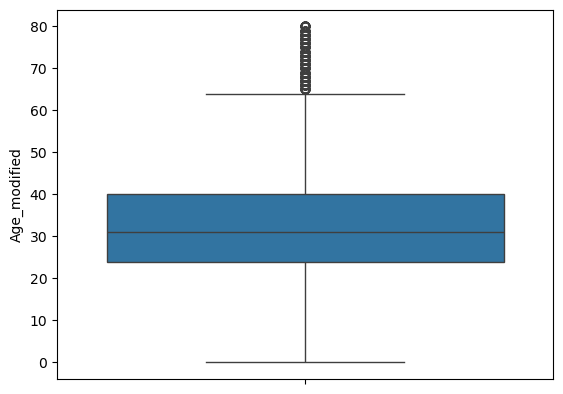

In [157]:
sns.boxplot(data = data,
            y = 'Age_modified',
            showfliers = True
           )
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [189]:
# your code goes here
query = """
SELECT AGE, CompTotal
FROM MAIN
"""

data = pd.read_sql_query(query, conn)
data

,Age,CompTotal
0,Under 18 years old,NaN
1,35-44 years old,NaN
2,45-54 years old,NaN
3,18-24 years old,NaN
4,18-24 years old,NaN
...,...,...
65432,18-24 years old,NaN
65433,25-34 years old,NaN
65434,25-34 years old,NaN
65435,18-24 years old,NaN


In [194]:
data.dropna(inplace = True)
data

,Age,CompTotal
72,18-24 years old,2040000.0
374,25-34 years old,28000.0
379,35-44 years old,85000.0
385,35-44 years old,50000.0
389,25-34 years old,110000.0
...,...,...
65396,18-24 years old,36000.0
65401,25-34 years old,40000.0
65408,25-34 years old,61000.0
65412,35-44 years old,58000.0


In [204]:
q1 = data['CompTotal'].quantile(0.25)
q3 = data['CompTotal'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + iqr * 1.5
lower_bound = q1 - iqr * 1.5

data = data[(data['CompTotal'] > lower_bound) & (data['CompTotal'] < upper_bound)]

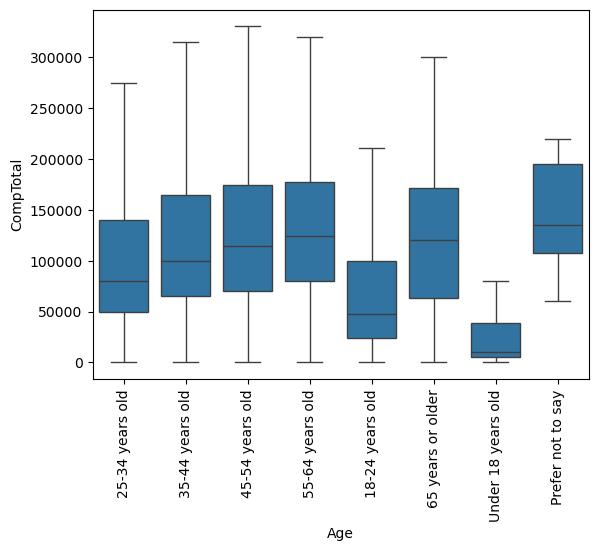

In [210]:
sns.boxplot(data = data,
            x = 'Age',
            y = 'CompTotal',
            showfliers = False
           )
plt.xticks(rotation = 90)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [267]:
query = """
SELECT CompTotal, JobSatPoints_6
FROM MAIN
"""
data = pd.read_sql_query(query, conn)
data.isna().sum()
data.dropna(inplace = True)
data

,CompTotal,JobSatPoints_6
72,2040000.0,65.0
379,85000.0,0.0
389,110000.0,20.0
392,126420.0,30.0
398,195000.0,30.0
...,...,...
65161,40000.0,20.0
65163,46000.0,50.0
65166,81600.0,20.0
65168,500000.0,0.0


In [269]:
q1 = data['CompTotal'].quantile(0.25)
q3 = data['CompTotal'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + iqr * 1.5
lower_bound = q1 - iqr * 1.5

data = data[(data['CompTotal'] > lower_bound) & (data['CompTotal'] < upper_bound)]
data

,CompTotal,JobSatPoints_6
379,85000.0,0.0
389,110000.0,20.0
392,126420.0,30.0
398,195000.0,30.0
415,74000.0,25.0
...,...,...
65161,40000.0,20.0
65163,46000.0,50.0
65166,81600.0,20.0
65168,500000.0,0.0


In [294]:
# Create bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# Create new column for grouped satisfaction
data['JobSatCategory'] = pd.cut(data['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)
data

/var/folders/03/_gz7cb5x1dg4n6fyxccvhqkh0000gn/T/ipykernel_64842/2450497024.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JobSatCategory'] = pd.cut(data['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)


,CompTotal,JobSatPoints_6,JobSatCategory
379,85000.0,0.0,Very Dissatisfied
389,110000.0,20.0,Very Dissatisfied
392,126420.0,30.0,Dissatisfied
398,195000.0,30.0,Dissatisfied
415,74000.0,25.0,Dissatisfied
...,...,...,...
65161,40000.0,20.0,Very Dissatisfied
65163,46000.0,50.0,Neutral
65166,81600.0,20.0,Very Dissatisfied
65168,500000.0,0.0,Very Dissatisfied


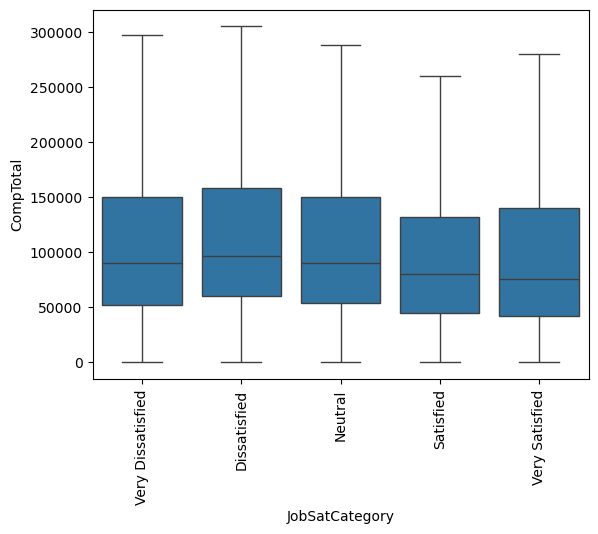

In [296]:
sns.boxplot(data = data,
            y = 'CompTotal',
            x = 'JobSatCategory',
            showfliers = False
           )
plt.xticks(rotation = 90)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [353]:
# your code goes here
query = """
SELECT ConvertedCompYearly, DevType
from main
"""
data = pd.read_sql_query(query, conn)
data['DevType_new'] = data['DevType'].str.split(', ')
data

,ConvertedCompYearly,DevType,DevType_new
0,NaN,None,None
1,NaN,"Developer, full-stack","[Developer, full-stack]"
2,NaN,Developer Experience,[Developer Experience]
3,NaN,"Developer, full-stack","[Developer, full-stack]"
4,NaN,"Developer, full-stack","[Developer, full-stack]"
...,...,...,...
65432,NaN,Blockchain,[Blockchain]
65433,NaN,None,None
65434,NaN,"Developer, mobile","[Developer, mobile]"
65435,NaN,"Developer, back-end","[Developer, back-end]"


In [357]:
data_exploded = data.explode('DevType_new')
data_exploded

,ConvertedCompYearly,DevType,DevType_new
0,NaN,None,None
1,NaN,"Developer, full-stack",Developer
1,NaN,"Developer, full-stack",full-stack
2,NaN,Developer Experience,Developer Experience
3,NaN,"Developer, full-stack",Developer
...,...,...,...
65434,NaN,"Developer, mobile",Developer
65434,NaN,"Developer, mobile",mobile
65435,NaN,"Developer, back-end",Developer
65435,NaN,"Developer, back-end",back-end


In [365]:
data_index = data_exploded['DevType_new'].value_counts(ascending = False).nlargest(5).index

In [378]:
data_filtered = data_exploded[data_exploded['DevType_new'].isin(data_index)]
data_filtered


,ConvertedCompYearly,DevType,DevType_new
1,NaN,"Developer, full-stack",Developer
1,NaN,"Developer, full-stack",full-stack
3,NaN,"Developer, full-stack",Developer
3,NaN,"Developer, full-stack",full-stack
4,NaN,"Developer, full-stack",Developer
...,...,...,...
65431,NaN,"Developer, full-stack",Developer
65431,NaN,"Developer, full-stack",full-stack
65434,NaN,"Developer, mobile",Developer
65435,NaN,"Developer, back-end",Developer


In [382]:
data_filtered.isna().sum()

ConvertedCompYearly    43788
DevType                    0
DevType_new                0
dtype: int64

In [386]:
data_filtered.dropna(inplace = True)
data_filtered

/var/folders/03/_gz7cb5x1dg4n6fyxccvhqkh0000gn/T/ipykernel_64842/3415540855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.dropna(inplace = True)


,ConvertedCompYearly,DevType,DevType_new
385,53703.0,"Developer, back-end",Developer
385,53703.0,"Developer, back-end",back-end
389,110000.0,Student,Student
398,195000.0,"Developer, full-stack",Developer
398,195000.0,"Developer, full-stack",full-stack
...,...,...,...
41185,116844.0,"Developer, full-stack",Developer
41185,116844.0,"Developer, full-stack",full-stack
41186,12000.0,"Developer, full-stack",Developer
41186,12000.0,"Developer, full-stack",full-stack


In [390]:
q1 = data_filtered['ConvertedCompYearly'].quantile(0.25)
q3 = data_filtered['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

data_cleaned = data_filtered[(data_filtered['ConvertedCompYearly'] > lower_bound) & (data_filtered['ConvertedCompYearly'] < upper_bound)]

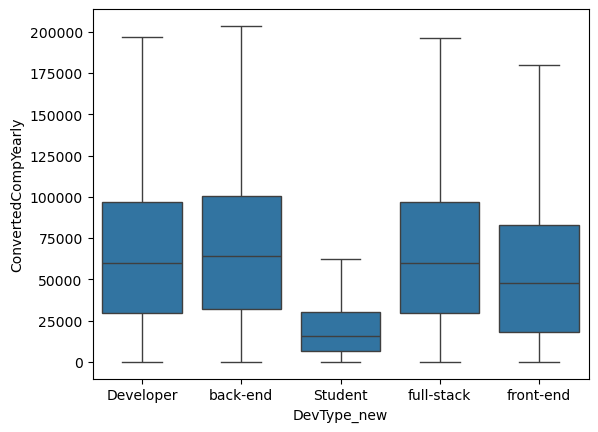

In [396]:
sns.boxplot(data = data_cleaned,
            x = 'DevType_new',
            y = 'ConvertedCompYearly',
            showfliers = False
           )
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [604]:
# your code goes here
query = """
SELECT CompTotal, COUNTRY
FROM MAIN;
"""
data = pd.read_sql_query(query, conn)
data.isna().sum()
data.dropna(inplace = True)
data


,CompTotal,Country
72,2040000.0,Pakistan
374,28000.0,Austria
379,85000.0,Turkey
385,50000.0,France
389,110000.0,United States of America
...,...,...
65396,36000.0,Lithuania
65401,40000.0,France
65408,61000.0,France
65412,58000.0,Italy


In [606]:
data_index = data['Country'].value_counts().nlargest(5).index

In [608]:
data_filtered = data[data['Country'].isin(data_index)]

In [610]:
q1 = data_filtered['CompTotal'].quantile(0.25)
q3 = data_filtered['CompTotal'].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

data_cleaned = data_filtered[(data_filtered['CompTotal'] > lower_bound) & (data_filtered['CompTotal'] < upper_bound)]

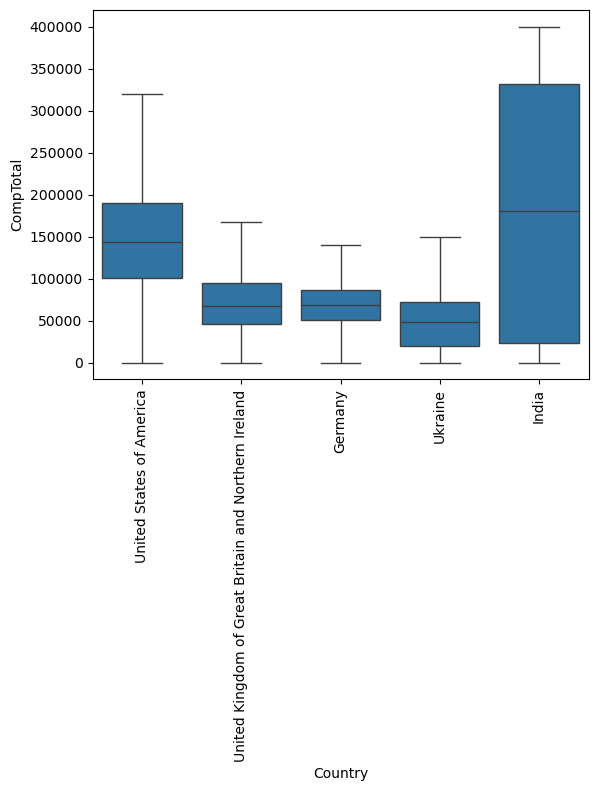

In [612]:
sns.boxplot(data = data_cleaned,
            y = 'CompTotal',
            x = 'Country',
            showfliers = False
           )
plt.xticks(rotation = 90)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [617]:
query = """
SELECT CompTotal ,Employment
FROM MAIN
"""
data = pd.read_sql_query(query, conn)
data.isna().sum()
data.dropna(inplace = True)
data.isna().sum()
data

,CompTotal,Employment
72,2040000.0,"Employed, full-time;Student, full-time;Indepen..."
374,28000.0,"Employed, full-time"
379,85000.0,"Employed, full-time"
385,50000.0,"Independent contractor, freelancer, or self-em..."
389,110000.0,"Employed, full-time;Student, part-time"
...,...,...
65396,36000.0,"Employed, full-time;Independent contractor, fr..."
65401,40000.0,"Employed, full-time"
65408,61000.0,"Employed, full-time"
65412,58000.0,"Employed, full-time"


In [619]:
data_index = data['Employment'].value_counts().nlargest(5).index

In [621]:
data = data[data['Employment'].isin(data_index)]

In [623]:
q1 = data['CompTotal'].quantile(0.25)
q3 = data['CompTotal'].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data_cleaned = data[(data['CompTotal'] > lower_bound) & (data['CompTotal'] < upper_bound)]
data_cleaned

,CompTotal,Employment
374,28000.0,"Employed, full-time"
379,85000.0,"Employed, full-time"
385,50000.0,"Independent contractor, freelancer, or self-em..."
389,110000.0,"Employed, full-time;Student, part-time"
392,126420.0,"Employed, full-time"
...,...,...
65396,36000.0,"Employed, full-time;Independent contractor, fr..."
65401,40000.0,"Employed, full-time"
65408,61000.0,"Employed, full-time"
65412,58000.0,"Employed, full-time"


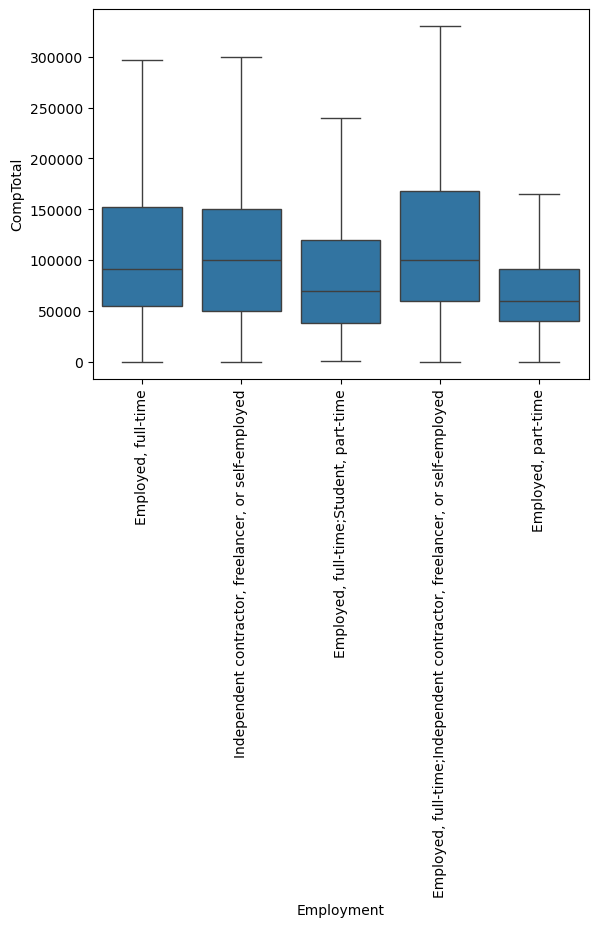

In [625]:
sns.boxplot(data = data_cleaned,
            y = 'CompTotal',
            x = 'Employment',
            showfliers = False
           )
plt.xticks(rotation = 90)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [692]:
# your code goes here
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM MAIN
"""
data = pd.read_sql_query(query, conn)
data.dropna(inplace = True)
data['YearsCodePro'].value_counts()

YearsCodePro
3                     2281
2                     2174
5                     2044
10                    1929
4                     1887
6                     1741
8                     1607
7                     1551
1                     1194
12                    1119
9                      975
15                     940
20                     823
Less than 1 year       814
11                     810
13                     708
14                     630
16                     578
18                     528
25                     509
17                     490
24                     347
30                     321
19                     311
22                     275
23                     256
26                     244
21                     217
27                     213
28                     172
35                     123
32                     100
29                      99
40                      91
34                      72
33                      71
36             

In [694]:
def convert_str_int(val):
    if pd.isna(val):
        return None
    elif val == 'More than 50 years':
        return 50
    elif val == 'Less than 1 year':
        return 0
    else:
        try:
            return int(val)
        except:
            return None

In [696]:
data['YearsCodePro_new'] = data['YearsCodePro'].apply(convert_str_int)
data

,YearsCodePro,JobSatPoints_6,YearsCodePro_new
1,17,0.0,17
12,12,30.0,12
15,27,0.0,27
18,10,60.0,10
20,Less than 1 year,100.0,0
...,...,...,...
65168,2,0.0,2
65178,17,0.0,17
65265,2,60.0,2
65351,7,0.0,7


In [714]:
bins = [0, 20 ,40, 60, 80, 100]

In [716]:
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

In [718]:
data['JobSatPoints_6_new'] = pd.cut(data['JobSatPoints_6'], bins = bins, labels = labels, include_lowest = True)
data['JobSatPoints_6_new']

1        Very Dissatisfied
12            Dissatisfied
15       Very Dissatisfied
18                 Neutral
20          Very Satisfied
               ...        
65168    Very Dissatisfied
65178    Very Dissatisfied
65265              Neutral
65351    Very Dissatisfied
65435    Very Dissatisfied
Name: JobSatPoints_6_new, Length: 28619, dtype: category
Categories (5, object): ['Very Dissatisfied' < 'Dissatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']

In [720]:
data

,YearsCodePro,JobSatPoints_6,YearsCodePro_new,JobSatPoints_6_new
1,17,0.0,17,Very Dissatisfied
12,12,30.0,12,Dissatisfied
15,27,0.0,27,Very Dissatisfied
18,10,60.0,10,Neutral
20,Less than 1 year,100.0,0,Very Satisfied
...,...,...,...,...
65168,2,0.0,2,Very Dissatisfied
65178,17,0.0,17,Very Dissatisfied
65265,2,60.0,2,Neutral
65351,7,0.0,7,Very Dissatisfied


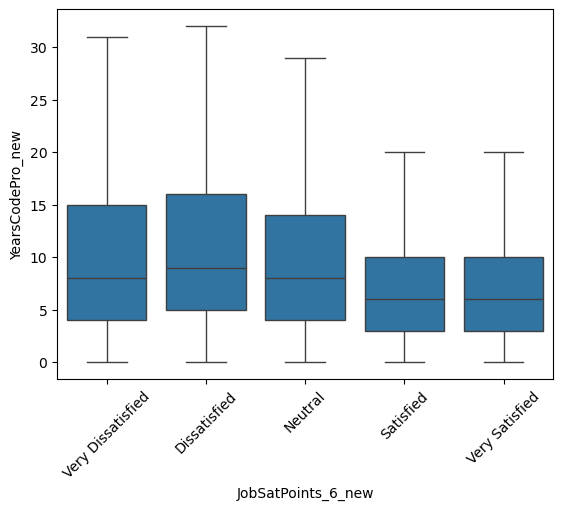

In [735]:
sns.boxplot(data = data,
            x = 'JobSatPoints_6_new',
            y = 'YearsCodePro_new',
            showfliers = False
           )
plt.xticks(rotation = 45)
plt.show()
            

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [737]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
